In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
all_data = pd.read_pickle('./data/text_conv_data.pkl')

print("Size of corpus: ", len(all_data))

Size of corpus:  4330


In [9]:
all_data.columns

Index(['Document', 'Text Content', 'Code', 'len', 'tloc', 'cloc', 'tpos1',
       'tpos2', 'clen', 'tlen', 'ppau', 'npau', 'aa_COLLABORATOR',
       'aa_CONTRIBUTOR', 'aa_MEMBER', 'aa_NONE', 'begauth_False',
       'begauth_True', 'has_code_False', 'has_code_True', 'first_turn_False',
       'first_turn_True', 'last_turn_False', 'last_turn_True'],
      dtype='object')

In [20]:
X = all_data['Text Content']
y = all_data['Code']

In [21]:
labels = set(list(y))
labels

{'Action on Issue',
 'Bug Reproduction',
 'Contribution and Commitment',
 'Expected Behaviour',
 'Investigation and Exploration',
 'Motivation',
 'Observed Bug Behaviour',
 'Potential New Issues and Requests',
 'Social Conversation',
 'Solution Discussion',
 'Task Progress',
 'Usage',
 'Workarounds'}

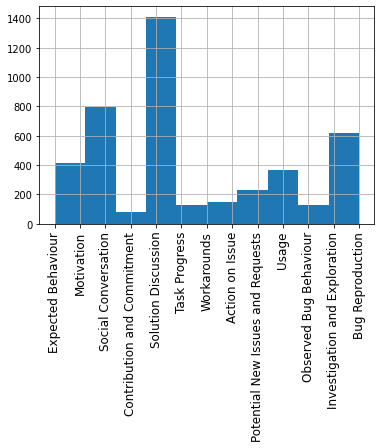

In [34]:
y.hist(xlabelsize=12, xrot=90)

Display the percentage of the classes

In [50]:
def calculate_percentage(y):
  return y.value_counts().div(y.count())

calculate_percentage(y)

Solution Discussion                  0.325866
Social Conversation                  0.184296
Investigation and Exploration        0.087067
Usage                                0.084988
Motivation                           0.066513
Bug Reproduction                     0.056582
Potential New Issues and Requests    0.053118
Observed Bug Behaviour               0.030254
Task Progress                        0.028868
Expected Behaviour                   0.028637
Workarounds                          0.020554
Contribution and Commitment          0.019169
Action on Issue                      0.014088
Name: Code, dtype: float64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [51]:
calculate_percentage(y_train)

Solution Discussion                  0.325924
Social Conversation                  0.184469
Investigation and Exploration        0.087182
Usage                                0.084873
Motivation                           0.066397
Bug Reproduction                     0.056582
Potential New Issues and Requests    0.053118
Observed Bug Behaviour               0.030312
Task Progress                        0.028868
Expected Behaviour                   0.028580
Workarounds                          0.020497
Contribution and Commitment          0.019053
Action on Issue                      0.014145
Name: Code, dtype: float64

In [52]:
calculate_percentage(y_test)

Solution Discussion                  0.325635
Social Conversation                  0.183603
Investigation and Exploration        0.086605
Usage                                0.085450
Motivation                           0.066975
Bug Reproduction                     0.056582
Potential New Issues and Requests    0.053118
Observed Bug Behaviour               0.030023
Task Progress                        0.028868
Expected Behaviour                   0.028868
Workarounds                          0.020785
Contribution and Commitment          0.019630
Action on Issue                      0.013857
Name: Code, dtype: float64

In [55]:
train = pd.merge(X_train, y_train, on=X_train.index, how='outer')
train.to_pickle("./data/train.pkl")
train

,key_0,Text Content,Code
0,203,- This test generates training data as...,Solution Discussion
1,203,- This test generates training data as...,Social Conversation
2,203,- This test generates training data as...,Social Conversation
3,203,- This test generates training data as...,Social Conversation
4,203,- This test generates training data as...,Investigation and Exploration
...,...,...,...
31805,626,My dataset contains one column with sequences ...,Usage
31806,589,An easier way of inputting data from native py...,Expected Behaviour
31807,618,The performance gain of using the new Dataset ...,Solution Discussion
31808,593,The threads are daemons so shuts down when the...,Solution Discussion


In [57]:
test = pd.merge(X_test, y_test, on=X_test.index, how='outer')
test.to_pickle("./data/test.pkl")
test

,key_0,Text Content,Code
0,314,Let's the do something useful for community in...,Social Conversation
1,314,Let's the do something useful for community in...,Task Progress
2,314,First documentation on master under CODE: http...,Social Conversation
3,314,First documentation on master under CODE: http...,Task Progress
4,220,Maybe this a pretty basic question but could y...,Solution Discussion
...,...,...,...
2589,587,I think the queues are nice enough.,Social Conversation
2590,567,CODE,Expected Behaviour
2591,328,"(I will do this when I'm available, aha)",Contribution and Commitment
2592,333,It may not be the right place to ask but I'd l...,Motivation


In [58]:
print("Size of the train data: ", len(train))
print("Size of the test data: ", len(test))

Size of the train data:  31810
Size of the test data:  2594
